# Preprocessing the dataset

In [1]:
import pandas as pd

## Data 1
dodgers loop sensor data set

### import data set

In [2]:
data_1_a = pd.read_csv(r'data\dodgers+loop+sensor\Dodgers.data', sep=',', engine='python', header=None)
data_1_b = pd.read_csv(r'data\dodgers+loop+sensor\Dodgers.events', sep=',', engine='python', header=None, encoding='windows-1252')

In [3]:
data_1_a.columns = ['timestamp', 'count']
data_1_a.head(1)

,timestamp,count
0,4/10/2005 0:00,-1


In [4]:
data_1_b.columns = ['date', 'begin_time', 'end_time', 'game_attendance', 'away_team', 'w/l_score']
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8


In [5]:
data_1_a['timestamp'] = pd.to_datetime(data_1_a['timestamp'], format="mixed")

In [6]:
data_1_a.head(3)

,timestamp,count
0,2005-04-10 00:00:00,-1
1,2005-04-10 00:05:00,-1
2,2005-04-10 00:10:00,-1


In [7]:
data_1_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  50400 non-null  datetime64[ns]
 1   count      50400 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 787.6 KB


<Axes: xlabel='timestamp'>

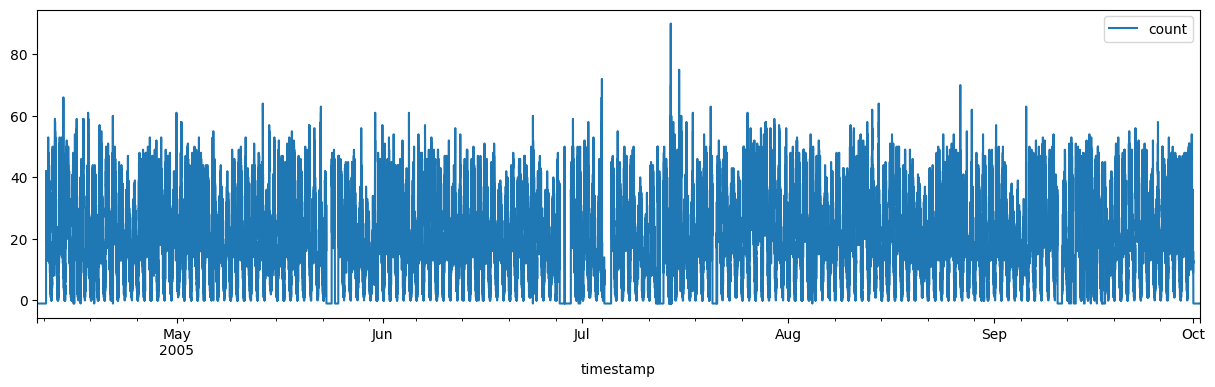

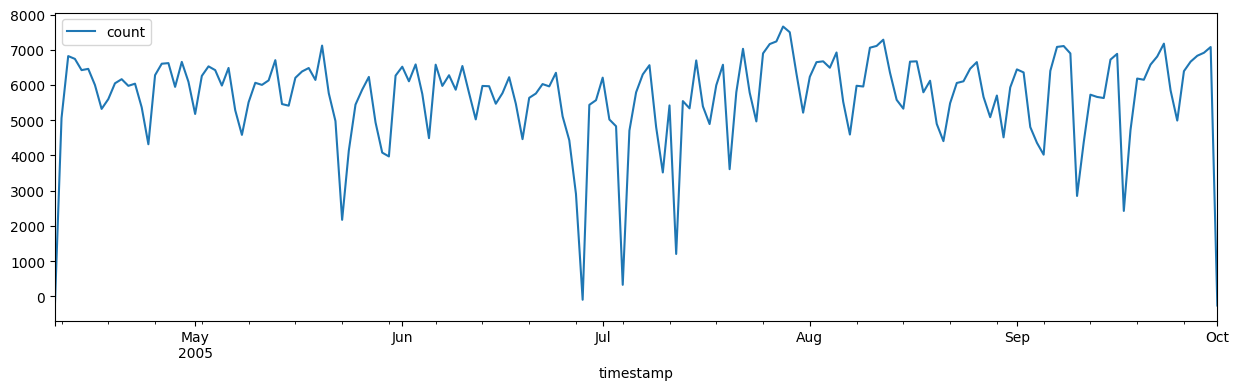

In [8]:
data_1_a.plot(x='timestamp', y='count', figsize=(15, 4))

data_1_a_resampled = data_1_a.resample('D', on='timestamp').sum()
data_1_a_resampled.plot(y='count', figsize=(15, 4))

### add labels into the data set

In [9]:
data_1_a.head(1)

,timestamp,count
0,2005-04-10,-1


In [10]:
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8


In [11]:
data_1_a['timestamp'][0]

Timestamp('2005-04-10 00:00:00')

In [12]:
pd.to_datetime(data_1_b['date'][0] + ' ' + data_1_b['begin_time'][0])

Timestamp('2005-04-12 13:10:00')

In [13]:
pd.to_datetime(data_1_b['date'][0] + ' ' + data_1_b['begin_time'][0]) < data_1_a['timestamp'][0]

False

In [14]:
data_1_b['timestamp_start'] = pd.to_datetime(data_1_b['date'] + ' ' + data_1_b['begin_time'], format='mixed')
data_1_b['timestamp_end'] = pd.to_datetime(data_1_b['date'] + ' ' + data_1_b['end_time'], format='mixed')
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score,timestamp_start,timestamp_end
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8,2005-04-12 13:10:00,2005-04-12 16:23:00


In [15]:
# Initialize the label column with default value
data_1_a['label'] = 0  # Start with 0, then mark 1 only for matching intervals

# Use vectorized operations to update the label based on timestamp intervals
for _, row in data_1_b.iterrows():
    mask = (data_1_a['timestamp'] >= row['timestamp_start']) & (data_1_a['timestamp'] <= row['timestamp_end'])
    data_1_a.loc[mask, 'label'] = 1

# Display the first 3 rows
data_1_a.head(3)

,timestamp,count,label
0,2005-04-10 00:00:00,-1,0
1,2005-04-10 00:05:00,-1,0
2,2005-04-10 00:10:00,-1,0


In [16]:
data_1_a[data_1_a['label'] == 0].head(3)

,timestamp,count,label
0,2005-04-10 00:00:00,-1,0
1,2005-04-10 00:05:00,-1,0
2,2005-04-10 00:10:00,-1,0


In [17]:
data_vis = data_1_a[(data_1_a['timestamp'] > '2005-06-05 00:00:00') & (data_1_a['timestamp'] < '2005-06-12 00:00:00')]

<Axes: xlabel='timestamp'>

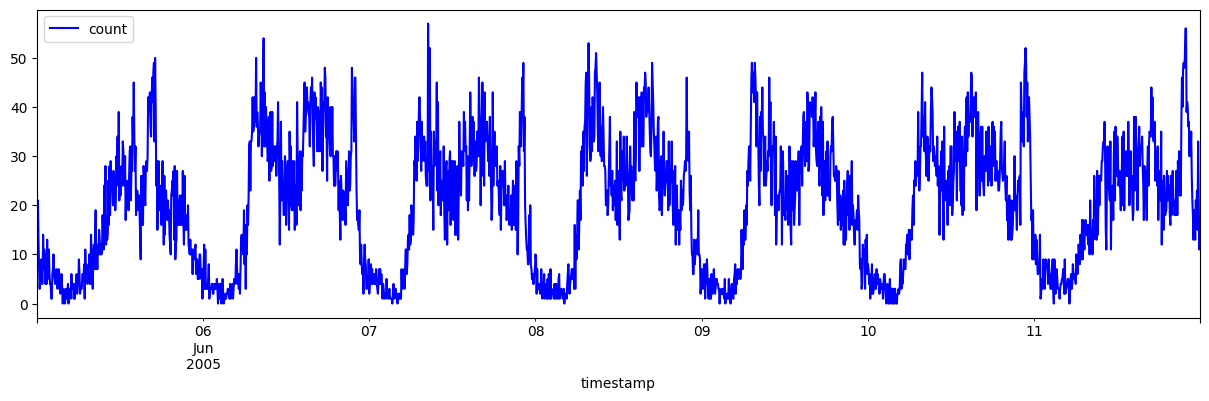

In [18]:
data_vis.plot(x='timestamp', y='count', figsize=(15, 4), color='blue')

In [19]:
data_vis.head(1)

,timestamp,count,label
16129,2005-06-05 00:05:00,8,0


In [20]:
data_1_b.head(1)

,date,begin_time,end_time,game_attendance,away_team,w/l_score,timestamp_start,timestamp_end
0,04/12/05,13:10:00,16:23:00,55892,San Francisco,W 9-8,2005-04-12 13:10:00,2005-04-12 16:23:00


In [21]:
data_1_b['timestamp_start']

0    2005-04-12 13:10:00
1    2005-04-13 19:10:00
2    2005-04-15 19:40:00
3    2005-04-16 19:10:00
4    2005-04-17 13:10:00
             ...        
76   2005-09-25 13:10:00
77   2005-09-26 19:10:00
78   2005-09-27 19:10:00
79   2005-09-28 19:10:00
80   2005-09-29 19:10:00
Name: timestamp_start, Length: 81, dtype: datetime64[ns]

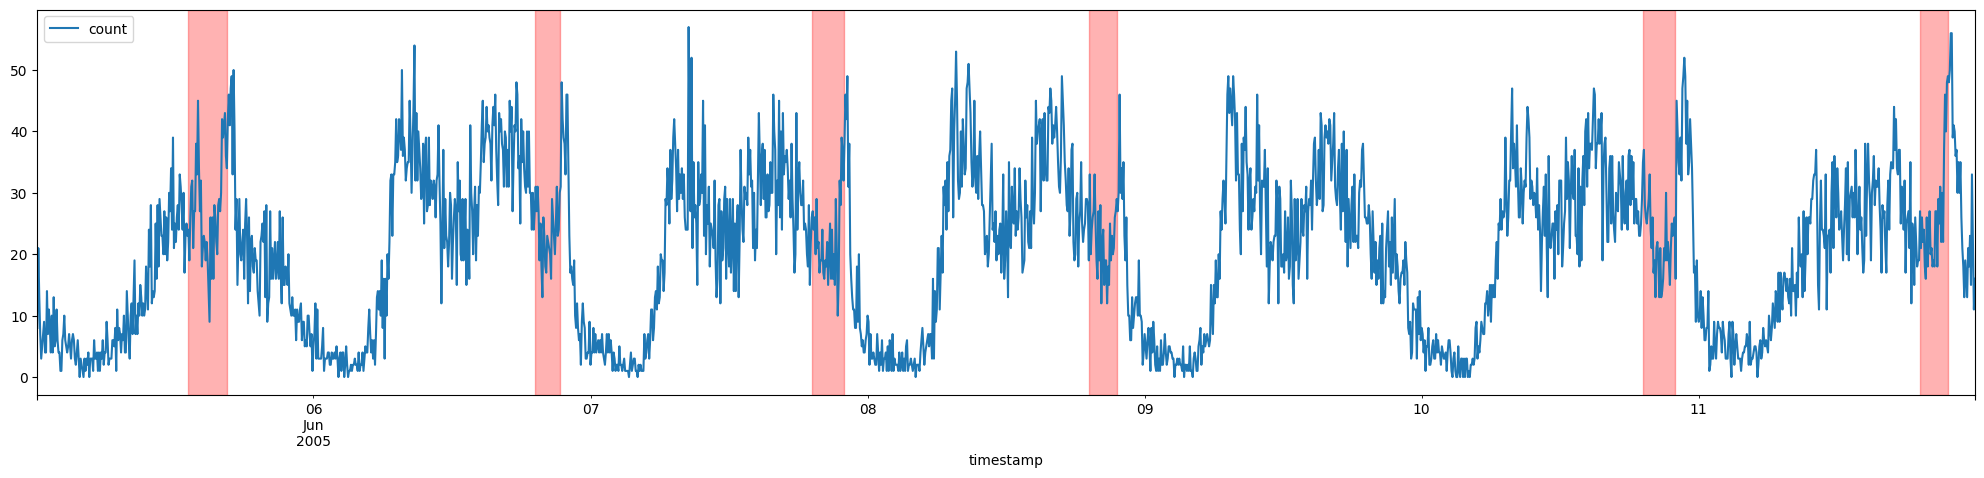

In [22]:
import matplotlib.pyplot as plt
start_time = data_1_b['timestamp_start']
end_time = data_1_b['timestamp_end']

data_vis.plot(x='timestamp', y='count', figsize=(25, 5))

for start, end in zip(start_time, end_time):
    plt.axvspan(start, end, color='red', alpha=0.3)

plt.show()


### preprocessing

#### normalize the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_1_a["count"] = scaler.fit_transform(data_1_a["count"].values.reshape(-1, 1))

### export data set

In [32]:
data_1_a.to_csv(r'data\dodgers_data.csv', index=False)

## Data 2
GHL Gasoil Plant Heating Loop data set

### Try

In [43]:
import os

directory = os.path.abspath(r'data\GHL')
files = os.listdir(directory)
files

['01_Lev_fault_Temp_corr_seed_11_vars_23.csv',
 '02_Lev_fault_Temp_corr_seed_17_vars_23.csv',
 '03_Lev_fault_Temp_corr_seed_19_vars_23.csv',
 '04_Lev_fault_Temp_corr_seed_23_vars_23.csv',
 '05_Lev_fault_Temp_corr_seed_27_vars_23.csv',
 '06_Lev_fault_Temp_corr_seed_29_vars_23.csv',
 '07_Lev_fault_Temp_corr_seed_31_vars_23.csv',
 '08_Lev_fault_Temp_corr_seed_33_vars_23.csv',
 '09_Lev_fault_Temp_corr_seed_37_vars_23.csv',
 '10_Lev_fault_Temp_corr_seed_39_vars_23.csv',
 '11_Lev_fault_Temp_corr_seed_41_vars_23.csv',
 '12_Lev_fault_Temp_corr_seed_43_vars_23.csv',
 '13_Lev_fault_Temp_corr_seed_666_vars_23.csv',
 '14_Lev_fault_Temp_corr_seed_47_vars_23.csv',
 '15_Lev_fault_Temp_corr_seed_49_vars_23.csv',
 '16_Lev_fault_Temp_corr_seed_53_vars_23.csv',
 '17_Lev_fault_Temp_corr_seed_57_vars_23.csv',
 '18_Lev_fault_Temp_corr_seed_59_vars_23.csv',
 '19_Lev_fault_Temp_corr_seed_62_vars_23.csv',
 '20_Lev_fault_Temp_corr_seed_67_vars_23.csv',
 '21_Lev_fault_Temp_corr_seed_73_vars_23.csv',
 '22_Lev_fau

In [54]:
data_2_train = pd.DataFrame()
data_2_test = pd.DataFrame()

for i in range(len(files)):
    if i <= 29:
        data_2_train_0 = pd.read_csv(os.path.join(directory, files[i]))
        data_2_train = pd.concat([data_2_train, data_2_train_0], ignore_index=True)
    if i > 29 and i <= 48:
        data_2_test_0 = pd.read_csv(os.path.join(directory, files[i]))
        data_2_test = pd.concat([data_2_train, data_2_train_0], ignore_index=True)

In [55]:
data_2_train.head(1)

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.149994,0.0,0.1,0.0,100.0,0.0


In [56]:
data_2_test.head(1)

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.149994,0.0,0.1,0.0,100.0,0.0


In [70]:
data_2_train.shape

(6139254, 24)

In [59]:
data_2_train.nunique()

Time                   248423
RT_level_ini              618
DANGER                      2
FAULT                       2
RT_temperature.T       632253
C_temperature.T         65187
RT_level              1152513
out_valve_act               2
dT_rand                   777
inv_valve_act               2
limiter.y                 627
inj_valve_act               2
Relaxing.active             2
boundary.m_flow_in          2
dir_valve_act               2
dt_rand                  7972
C_level                165069
HT_temperature.T      1141631
heater_act                  2
HT_level               368124
ATTACK                      2
limiter1.y               7972
dL_rand                   777
dtype: int64

In [60]:
data_2_test.nunique()

Time                   248423
RT_level_ini              618
DANGER                      2
FAULT                       2
RT_temperature.T       632253
C_temperature.T         65187
RT_level              1152513
out_valve_act               2
dT_rand                   777
inv_valve_act               2
limiter.y                 627
inj_valve_act               2
Relaxing.active             2
boundary.m_flow_in          2
dir_valve_act               2
dt_rand                  7972
C_level                165069
HT_temperature.T      1141631
heater_act                  2
HT_level               368124
ATTACK                      2
limiter1.y               7972
dL_rand                   777
dtype: int64

In [73]:
# Get columns with only 2 unique values
columns_with_two_unique_values = [col for col in data_2_train.columns if data_2_train[col].nunique() == 2]

# Get the distinct values for these columns
distinct_values = {col: data_2_train[col].unique() for col in columns_with_two_unique_values}
distinct_values

{'DANGER': array([0., 1.]),
 'FAULT': array([0., 1.]),
 'out_valve_act': array([0., 1.]),
 'inv_valve_act': array([0., 1.]),
 'inj_valve_act': array([0., 1.]),
 'Relaxing.active': array([0., 1.]),
 'boundary.m_flow_in': array([ 0., 20.]),
 'dir_valve_act': array([0., 1.]),
 'heater_act': array([0., 1.]),
 'ATTACK': array([0., 1.]),
 'true': array([True, False, nan], dtype=object)}

In [72]:
sum(data_2_train['FAULT'] == data_2_train['ATTACK'])

6100655

In [69]:
sum(data_2_train['DANGER'] == data_2_train['FAULT'])

6130682

### import data set

In [168]:
data_2 = pd.read_csv(r'data\GHL\01_Lev_fault_Temp_corr_seed_11_vars_23.csv')
data_2_b = pd.read_csv(r'data\GHL\02_Lev_fault_Temp_corr_seed_17_vars_23.csv')

In [169]:
data_2.head(3)

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.149994,0.0,0.1,0.0,100.0,0.0
1,1.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.163330,0.0,0.1,0.0,100.0,0.0
2,2.0,0.0,0.0,0.0,283.149994,273.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,283.176666,0.0,0.1,0.0,100.0,0.0


### Visualize

In [170]:
data_2.columns

Index(['Time', 'RT_level_ini', 'DANGER', 'FAULT', 'RT_temperature.T',
       'C_temperature.T', 'RT_level', 'out_valve_act', 'dT_rand',
       'inv_valve_act', 'limiter.y', 'inj_valve_act', 'Relaxing.active',
       'boundary.m_flow_in', 'dir_valve_act', 'dt_rand', 'C_level',
       'HT_temperature.T', 'heater_act', 'HT_level', 'ATTACK', 'limiter1.y',
       'dL_rand'],
      dtype='object')

In [171]:
data_2[data_2['FAULT']==1]

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,C_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,HT_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
48888,47911.507812,2.099773,1.0,1.0,297.826141,328.820648,2.980000,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.519287,0.0,0.1,1.0,114.924164,0.836238
48889,47912.000000,2.099773,1.0,1.0,297.823975,328.820648,2.980992,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.516418,0.0,0.1,1.0,114.924164,0.836238
48890,47913.000000,2.099773,1.0,1.0,297.819641,328.820648,2.983001,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.510590,0.0,0.1,1.0,114.924164,0.836238
48891,47914.000000,2.099773,1.0,1.0,297.815277,328.820648,2.985010,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.504761,0.0,0.1,1.0,114.924164,0.836238
48892,47915.000000,2.099773,1.0,1.0,297.810944,328.820648,2.987019,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.498962,0.0,0.1,1.0,114.924164,0.836238
48893,47916.000000,2.099773,1.0,1.0,297.806610,328.820648,2.989028,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.493164,0.0,0.1,1.0,114.924164,0.836238
48894,47916.484375,2.099773,1.0,1.0,297.804504,328.820648,2.990000,0.0,0.836238,0.0,...,20.0,0.0,1.492416,0.40523,297.490356,0.0,0.1,1.0,114.924164,0.836238


In [172]:
data_2_vis = data_2[(data_2['Time']>41000) & (data_2['Time']<60000)]

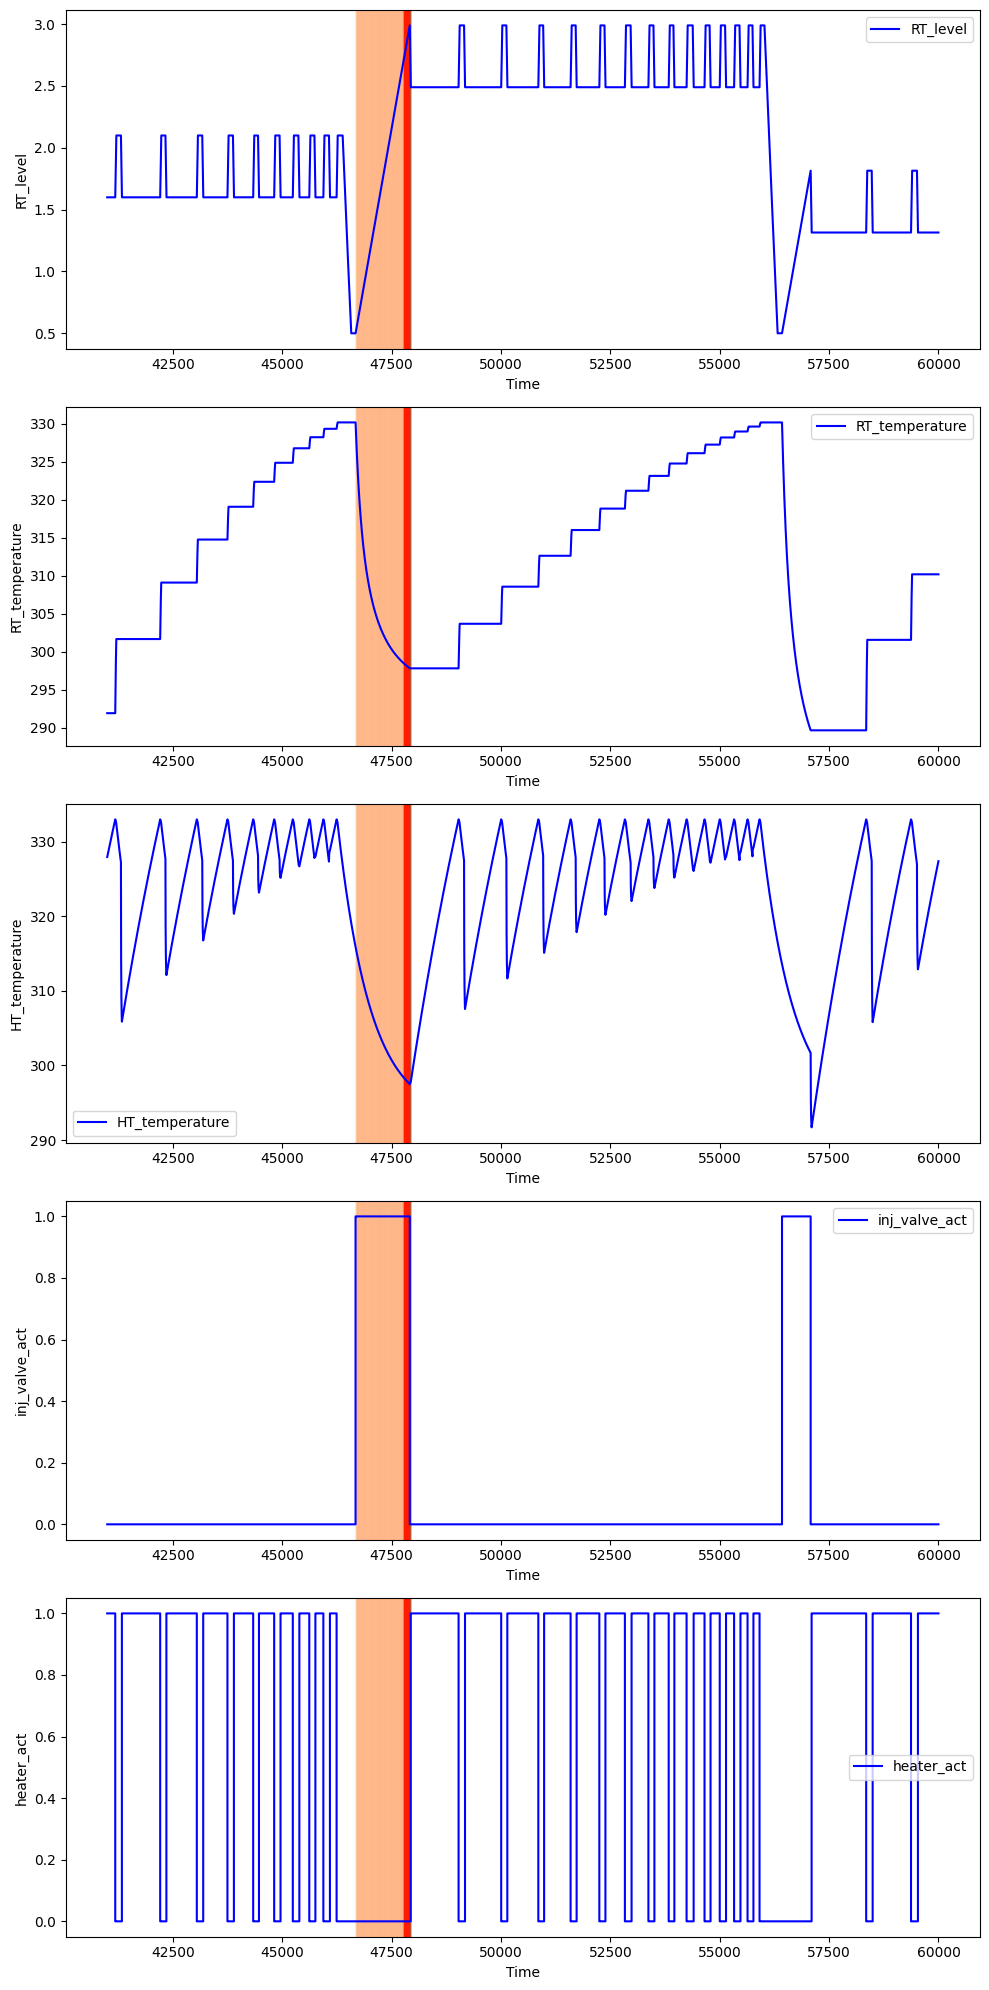

In [173]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Plotting RT_level
axs[0].plot(data_2_vis['Time'], data_2_vis['RT_level'], label='RT_level', color='blue')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('RT_level')
axs[0].legend()

# Highlighting where DANGER is 1
danger_times = data_2_vis[data_2_vis['DANGER'] == 1]['Time']
for time in danger_times:
    axs[0].axvspan(time, time + 1, color='red', alpha=0.1)

# Highlighting where FAULT is 1
fault_times = data_2_vis[data_2_vis['FAULT'] == 1]['Time']
for time in fault_times:
    axs[0].axvspan(time, time + 1, color='grey', alpha=0.1) 

# Highlighting where ATTACK is 1
attack_times = data_2_vis[data_2_vis['ATTACK'] == 1]['Time']
for time in attack_times:
    axs[0].axvspan(time, time + 1, color='orange', alpha=0.01)    



# Plotting RT_temperature.T
axs[1].plot(data_2_vis['Time'], data_2_vis['RT_temperature.T'], label='RT_temperature', color='blue')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('RT_temperature')
axs[1].legend()

# Highlighting DANGER, ATTACK, and FAULT
for time in danger_times:
    axs[1].axvspan(time, time + 1, color='red', alpha=0.1)
for time in fault_times:
    axs[1].axvspan(time, time + 1, color='grey', alpha=0.1)
for time in attack_times:
    axs[1].axvspan(time, time + 1, color='orange', alpha=0.01)

# Plotting HT_temperature.T
axs[2].plot(data_2_vis['Time'], data_2_vis['HT_temperature.T'], label='HT_temperature', color='blue')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('HT_temperature')
axs[2].legend()

# Highlighting where DANGER is 1
for time in danger_times:
    axs[2].axvspan(time, time + 1, color='red', alpha=0.1)
for time in fault_times:
    axs[2].axvspan(time, time + 1, color='grey', alpha=0.1)
for time in attack_times:
    axs[2].axvspan(time, time + 1, color='orange', alpha=0.01)

# Plotting inj_valve_act
axs[3].plot(data_2_vis['Time'], data_2_vis['inj_valve_act'], label='inj_valve_act', color='blue')
axs[3].set_xlabel('Time')
axs[3].set_ylabel('inj_valve_act')
axs[3].legend()

# Highlighting where DANGER is 1
for time in danger_times:
    axs[3].axvspan(time, time + 1, color='red', alpha=0.1)
for time in fault_times:
    axs[3].axvspan(time, time + 1, color='grey', alpha=0.1)
for time in attack_times:
    axs[3].axvspan(time, time + 1, color='orange', alpha=0.01)

# Plotting heater_act
axs[4].plot(data_2_vis['Time'], data_2_vis['heater_act'], label='heater_act', color='blue')
axs[4].set_xlabel('Time')
axs[4].set_ylabel('heater_act')
axs[4].legend()

# Highlighting where DANGER is 1
for time in danger_times:
    axs[4].axvspan(time, time + 1, color='red', alpha=0.1)
for time in fault_times:
    axs[4].axvspan(time, time + 1, color='grey', alpha=0.1)
for time in attack_times:
    axs[4].axvspan(time, time + 1, color='orange', alpha=0.01)

plt.tight_layout()
plt.show()


### preprocessing

#### drop similar columns

In [174]:
data_2.drop(['ATTACK', 'FAULT'], axis=1, inplace=True)
data_2_b.drop(['ATTACK', 'FAULT'], axis=1, inplace=True)

In [175]:
data_2.nunique()

Time                  201602
RT_level_ini              25
DANGER                     2
RT_temperature.T       29239
C_temperature.T         5355
RT_level               40035
out_valve_act              2
dT_rand                   27
inv_valve_act              2
limiter.y                 22
inj_valve_act              2
Relaxing.active            2
boundary.m_flow_in         2
dir_valve_act              2
dt_rand                  273
C_level                 5407
HT_temperature.T      176032
heater_act                 2
HT_level               12329
limiter1.y               273
dL_rand                   27
dtype: int64

#### one hot encoding categorical data

In [176]:
columns_ohc = ['out_valve_act', 'inv_valve_act', 'inj_valve_act', 'Relaxing.active', 'boundary.m_flow_in', 'dir_valve_act', 'heater_act']
data_2 = pd.get_dummies(data_2, columns=columns_ohc, drop_first=True)
data_2_b = pd.get_dummies(data_2_b, columns=columns_ohc, drop_first=True)

In [177]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204560 entries, 0 to 204559
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Time                     204560 non-null  float64
 1   RT_level_ini             204560 non-null  float64
 2   DANGER                   204560 non-null  float64
 3   RT_temperature.T         204560 non-null  float64
 4   C_temperature.T          204560 non-null  float64
 5   RT_level                 204560 non-null  float64
 6   dT_rand                  204560 non-null  float64
 7   limiter.y                204560 non-null  float64
 8   dt_rand                  204560 non-null  float64
 9   C_level                  204560 non-null  float64
 10  HT_temperature.T         204560 non-null  float64
 11  HT_level                 204560 non-null  float64
 12  limiter1.y               204560 non-null  float64
 13  dL_rand                  204560 non-null  float64
 14  out_

In [178]:
# Select columns that are not one-hot encoded
columns_to_normalize = data_2.select_dtypes(include=['float64']).columns


# change datatypes into float64
target_dtypes = ['bool']

for col in data_2.columns:
    if data_2[col].dtype in target_dtypes:
        data_2[col] = data_2[col].astype(float)

for col in data_2_b.columns:
    if data_2_b[col].dtype in target_dtypes:
        data_2_b[col] = data_2_b[col].astype(float)

data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204560 entries, 0 to 204559
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Time                     204560 non-null  float64
 1   RT_level_ini             204560 non-null  float64
 2   DANGER                   204560 non-null  float64
 3   RT_temperature.T         204560 non-null  float64
 4   C_temperature.T          204560 non-null  float64
 5   RT_level                 204560 non-null  float64
 6   dT_rand                  204560 non-null  float64
 7   limiter.y                204560 non-null  float64
 8   dt_rand                  204560 non-null  float64
 9   C_level                  204560 non-null  float64
 10  HT_temperature.T         204560 non-null  float64
 11  HT_level                 204560 non-null  float64
 12  limiter1.y               204560 non-null  float64
 13  dL_rand                  204560 non-null  float64
 14  out_

#### normalize continuous data

In [ ]:
columns_to_normalize = columns_to_normalize.drop('Time')
columns_to_normalize = columns_to_normalize.drop('DANGER')
columns_to_normalize

Index(['RT_level_ini', 'DANGER', 'RT_temperature.T', 'C_temperature.T',
       'RT_level', 'dT_rand', 'limiter.y', 'dt_rand', 'C_level',
       'HT_temperature.T', 'HT_level', 'limiter1.y', 'dL_rand'],
      dtype='object')

In [183]:
# Apply MinMaxScaler to these columns
scaler = MinMaxScaler()
data_2[columns_to_normalize] = scaler.fit_transform(data_2[columns_to_normalize])
data_2_b[columns_to_normalize] = scaler.fit_transform(data_2_b[columns_to_normalize])

In [184]:
data_2.head(3)

,Time,RT_level_ini,DANGER,RT_temperature.T,C_temperature.T,RT_level,dT_rand,limiter.y,dt_rand,C_level,...,HT_level,limiter1.y,dL_rand,out_valve_act_1.0,inv_valve_act_1.0,inj_valve_act_1.0,Relaxing.active_1.0,boundary.m_flow_in_20.0,dir_valve_act_1.0,heater_act_1.0
0,0.0,0.0,0.0,0.002441,0.0,0.0,0.461757,0.35503,0.500675,0.0,...,0.0,0.500675,0.461757,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.002441,0.0,0.0,0.461757,0.35503,0.500675,0.0,...,0.0,0.500675,0.461757,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.002441,0.0,0.0,0.461757,0.35503,0.500675,0.0,...,0.0,0.500675,0.461757,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Export data set

In [185]:
data_2.to_csv(r'data\ghl_data.csv', index=False)
data_2_b.to_csv(r'data\ghl_data_b.csv', index=False)

## Data 3
Electromyography (EMG) data for hand gestures

### import data set

In [160]:
data_3 = pd.read_csv(r'data\EMG_data_for_gestures-master\01\1_raw_data_13-12_22.03.16.txt', sep='\t')

In [190]:
data_3.head(3)

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


**Description of raw_data _file**


Each file consist of 10 columns:
- [1] Time - time in ms;
- [2-9] Channel - eightEMG channels of MYO Thalmic bracelet;
- [10] Class – thelabel of gestures:
 
0) unmarked data,
1) hand at rest, 
2) hand clenched in a fist, 
3) wrist flexion,
4) wrist extension,
5) radial deviations,
6) ulnar deviations,
7) extended palm (the gesture was not performed by all subjects).

In [163]:
data_3['class'].value_counts()

class
0    41272
3     3816
1     3780
6     3747
5     3615
2     3525
4     3441
Name: count, dtype: int64

In [197]:
data_3['target'] = data_3['class'].apply(lambda x: 1 if x != 0 else 0)

In [198]:
data_3['target'].value_counts()

target
0    41272
1    21924
Name: count, dtype: int64

### Visualize

In [199]:
data_3_vis = data_3[(data_3['time'] > 0) & (data_3['time'] < 20000)]

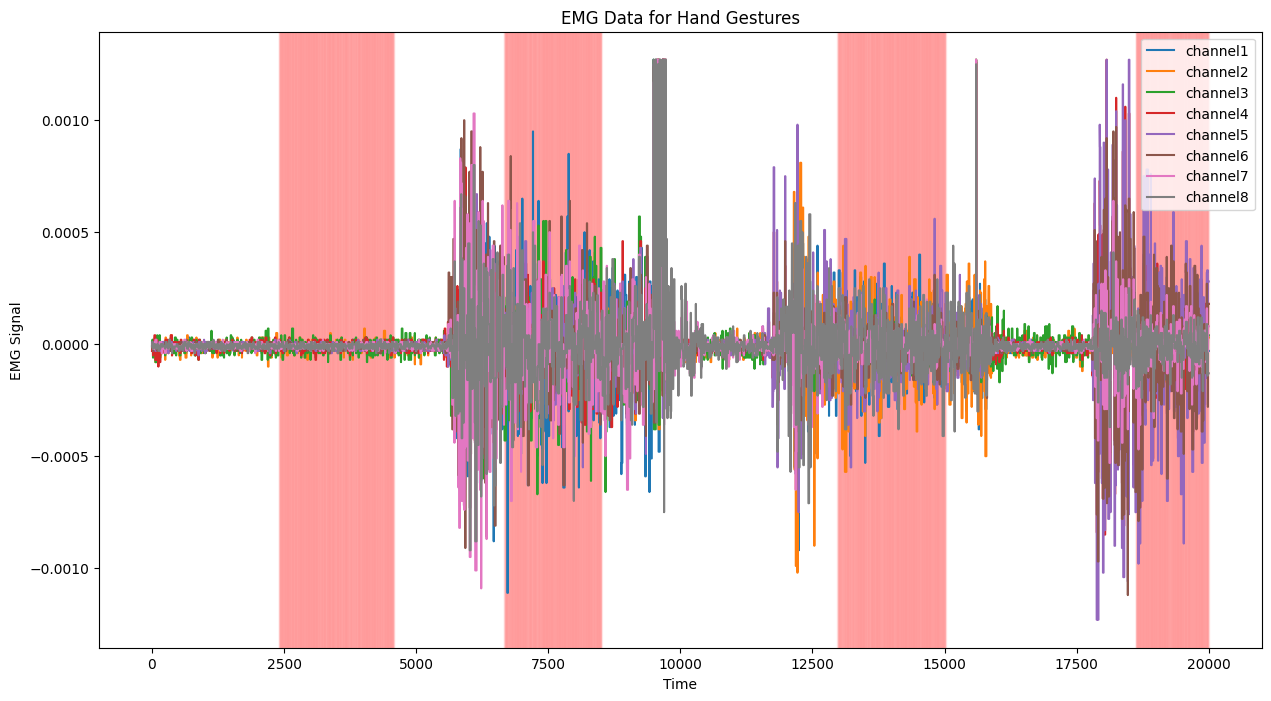

In [203]:
data_3_vis.plot(x='time', y=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8'], figsize=(15, 8))
plt.xlabel('Time')
plt.ylabel('EMG Signal')
plt.title('EMG Data for Hand Gestures')
plt.legend(loc='upper right')

# Highlight regions where target is 1
for _, row in data_3_vis.iterrows():
    if row['target'] == 1:
        plt.axvspan(row['time'], row['time'] + 1, color='red', alpha=0.01)

plt.show()

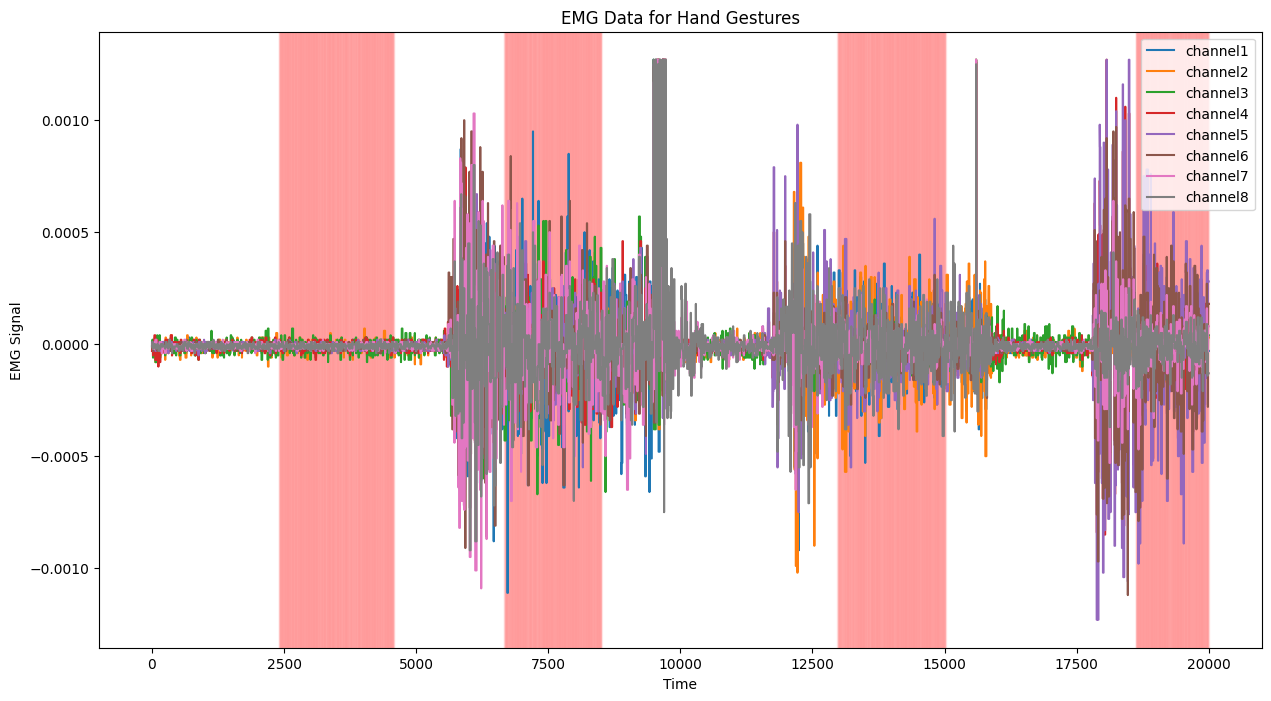

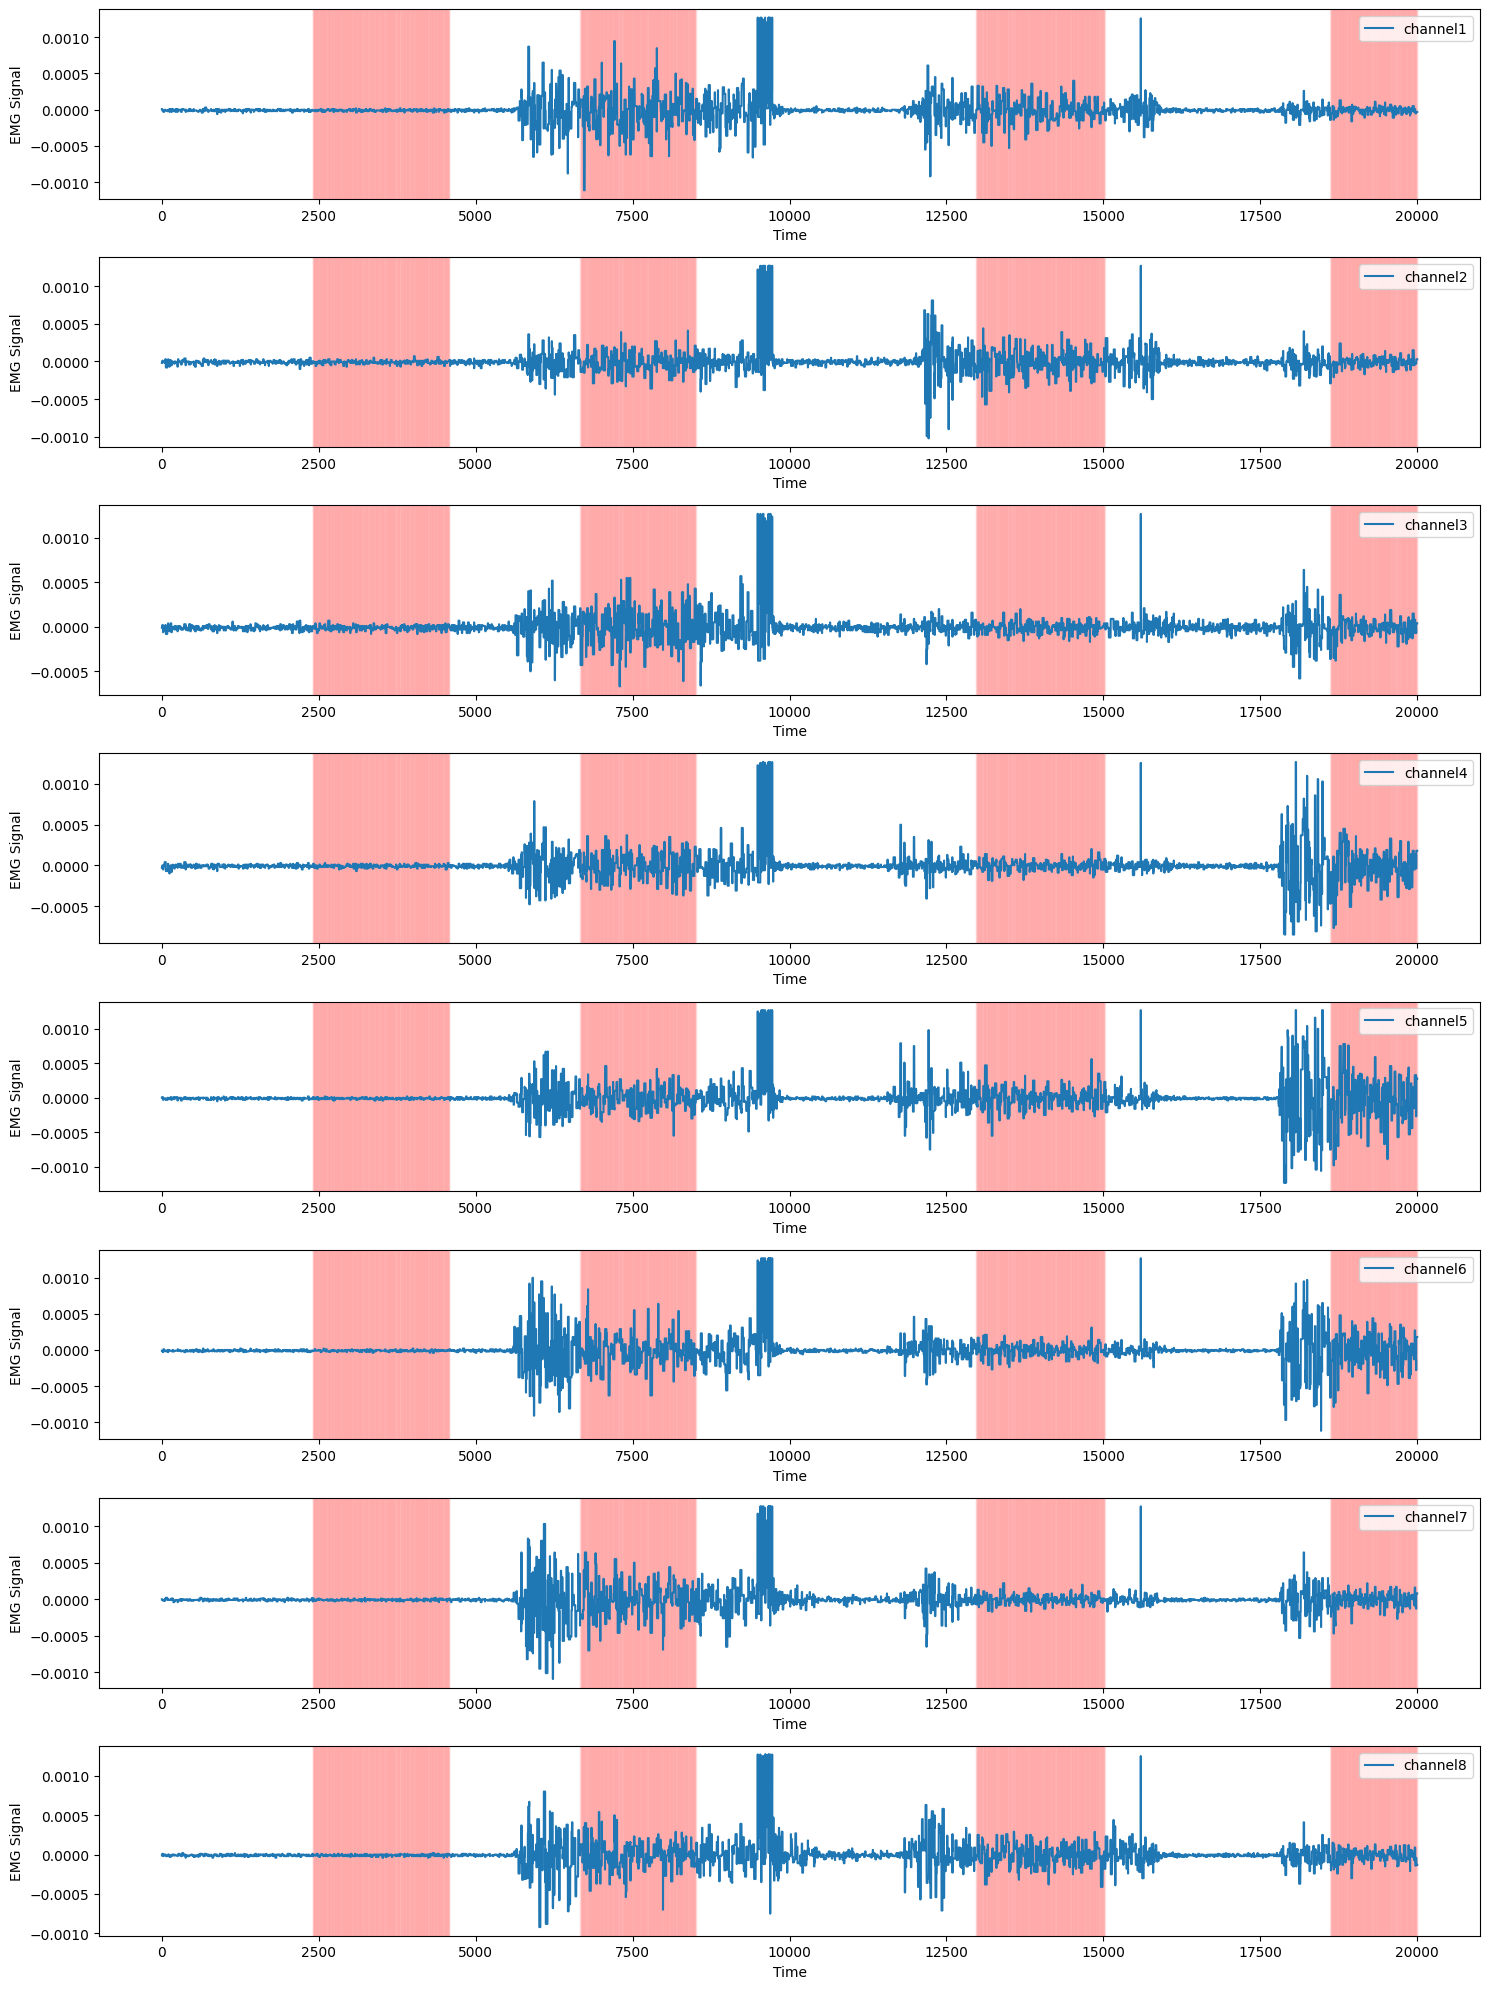

In [208]:
data_3_vis.plot(x='time', y=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8'], figsize=(15, 8))
plt.xlabel('Time')
plt.ylabel('EMG Signal')
plt.title('EMG Data for Hand Gestures')
plt.legend(loc='upper right')

# Highlight regions where target is 1
for _, row in data_3_vis.iterrows():
    if row['target'] == 1:
        plt.axvspan(row['time'], row['time'] + 1, color='red', alpha=0.01)

plt.show()
fig, axs = plt.subplots(8, 1, figsize=(15, 20))

channels = ['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8']

for i, channel in enumerate(channels):
    axs[i].plot(data_3_vis['time'], data_3_vis[channel], label=channel)
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('EMG Signal')
    axs[i].legend(loc='upper right')
    
    # Highlight regions where target is 1
    for _, row in data_3_vis.iterrows():
        if row['target'] == 1:
            axs[i].axvspan(row['time'], row['time'] + 1, color='red', alpha=0.01)

plt.tight_layout()
plt.show()

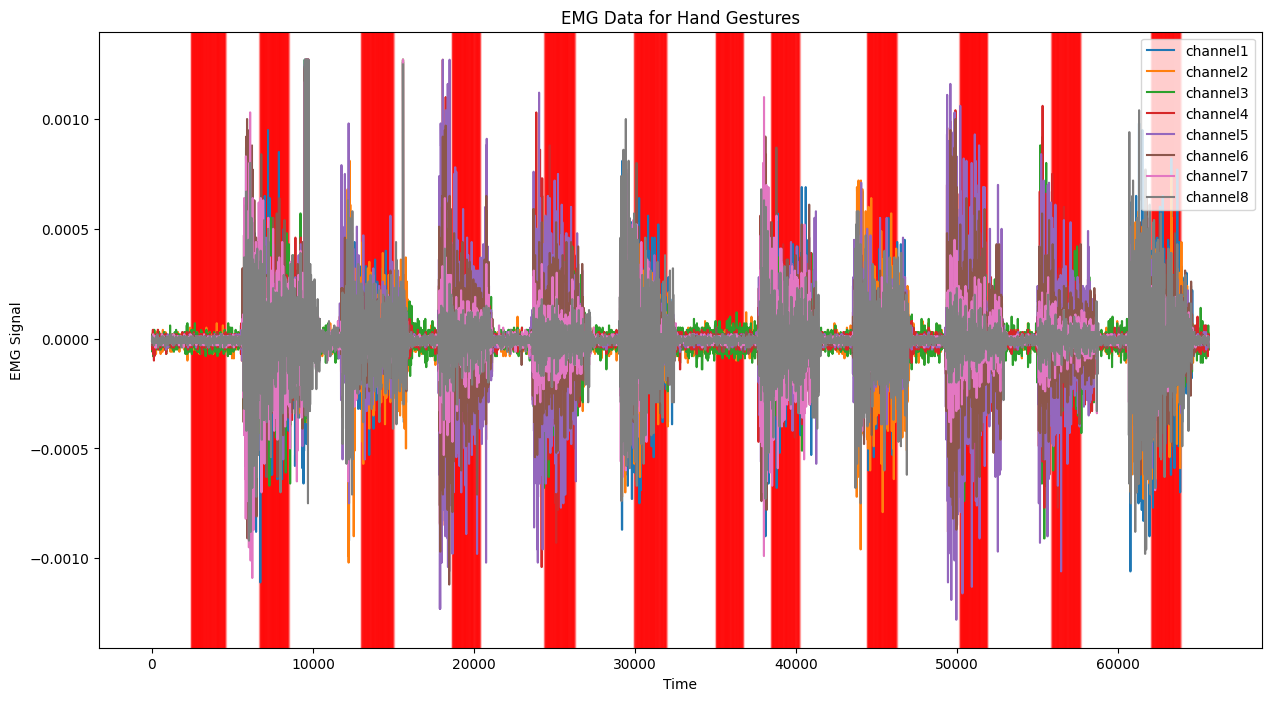

In [202]:
data_3.plot(x='time', y=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8'], figsize=(15, 8))
plt.xlabel('Time')
plt.ylabel('EMG Signal')
plt.title('EMG Data for Hand Gestures')
plt.legend(loc='upper right')

# Highlight regions where target is 1
for _, row in data_3.iterrows():
    if row['target'] == 1:
        plt.axvspan(row['time'], row['time'] + 1, color='red', alpha=0.01)

plt.show()

### preprocessing

In [204]:
data_3['target'].value_counts()

target
0    41272
1    21924
Name: count, dtype: int64

#### drop the class column

In [205]:
data_3.drop(columns=['class'], inplace=True)

#### normalize the data

In [206]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_normalize = data_3.columns.difference(['time', 'target'])

data_3[columns_to_normalize] = scaler.fit_transform(data_3[columns_to_normalize])

data_3.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,target
0,1,0.470588,0.436681,0.412844,0.437229,0.501961,0.464435,0.461864,0.431111,0
1,5,0.470588,0.436681,0.412844,0.437229,0.501961,0.464435,0.461864,0.431111,0
2,6,0.462185,0.449782,0.426606,0.450216,0.505882,0.460251,0.457627,0.440000,0
3,7,0.462185,0.449782,0.426606,0.450216,0.505882,0.460251,0.457627,0.440000,0
4,8,0.462185,0.449782,0.426606,0.450216,0.505882,0.460251,0.457627,0.440000,0


In [207]:
data_3.to_csv(r'data\emg_data.csv', index=False)